In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
files_path = "../data/"
file_list = os.listdir(files_path)
file_list

['car_records_900.csv',
 'car_records_1000.csv',
 'car_records_800.csv',
 'car_records_400.csv',
 'car_records_600.csv',
 'car_records_200.csv',
 'car_records_700.csv',
 'car_records_500.csv',
 'car_records_100.csv',
 'car_records_300.csv']

Concatenate csv files

In [5]:
df_concat = pd.DataFrame()
dataframes_from_csv = []

for csv_filename in file_list:
    df_temp = pd.read_csv(files_path + csv_filename)
    dataframes_from_csv.append(df_temp)

df_concat = pd.concat(dataframes_from_csv, ignore_index=True)
df_concat.shape

SyntaxError: invalid syntax (2035958694.py, line 1)

Find and remove duplicate rows

In [11]:
duplicate_rows = df_concat[df_concat.duplicated()]
len(duplicate_rows)


1

In [12]:
df_concat.drop_duplicates(inplace=True)
df_concat.shape

(15417, 17)

In [17]:
df_concat.drop("Unnamed: 0", axis=1, inplace=True)
df_concat.head(2)

,title,price,make,model,year,mileage,fuel_type,engine_power,engine_capacity,transmission,pollution_standard,gearbox,body_type,country_origin,original_owner,no_accident
0,Ford Kuga 2.0 TDCi 4x4 Aut. Individual,10500.0,Ford,Kuga,2015,214 547 km,Diesel,140 CP,1 997 cm3,4x4 (manual),NaN,Automata,SUV,NaN,NaN,NaN
1,Audi Q3 2.0 40 TFSI S tronic quattro S Line,28600.0,Audi,Q3,2021,36 000 km,Benzina,190 CP,1 984 cm3,4x4 (automat),Euro 6,Automata,SUV,NaN,NaN,NaN


In [18]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15417 entries, 0 to 15417
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               15417 non-null  object 
 1   price               15417 non-null  float64
 2   make                15417 non-null  object 
 3   model               15417 non-null  object 
 4   year                15417 non-null  int64  
 5   mileage             15363 non-null  object 
 6   fuel_type           15417 non-null  object 
 7   engine_power        15386 non-null  object 
 8   engine_capacity     14992 non-null  object 
 9   transmission        12689 non-null  object 
 10  pollution_standard  9797 non-null   object 
 11  gearbox             15417 non-null  object 
 12  body_type           15417 non-null  object 
 13  country_origin      7905 non-null   object 
 14  original_owner      5327 non-null   object 
 15  no_accident         8550 non-null   object 
dtypes: float6

In [19]:
df_concat.isna().sum()

title                     0
price                     0
make                      0
model                     0
year                      0
mileage                  54
fuel_type                 0
engine_power             31
engine_capacity         425
transmission           2728
pollution_standard     5620
gearbox                   0
body_type                 0
country_origin         7512
original_owner        10090
no_accident            6867
dtype: int64

Drop rows that contain null values for the following columns: mileage, engine_power, engine_capacity.

In [22]:
df_concat.dropna(subset=["mileage", "engine_power", "engine_capacity"], inplace=True)

What is the count of cars for each brand?

In [35]:
make_counts = df_concat["make"].value_counts()
make_counts

make
BMW              2108
Mercedes-Benz    2101
Volkswagen       1695
Audi             1364
Skoda             847
                 ... 
Genesis             1
McLaren             1
Rover               1
Chrysler            1
Chatenet            1
Name: count, Length: 62, dtype: int64

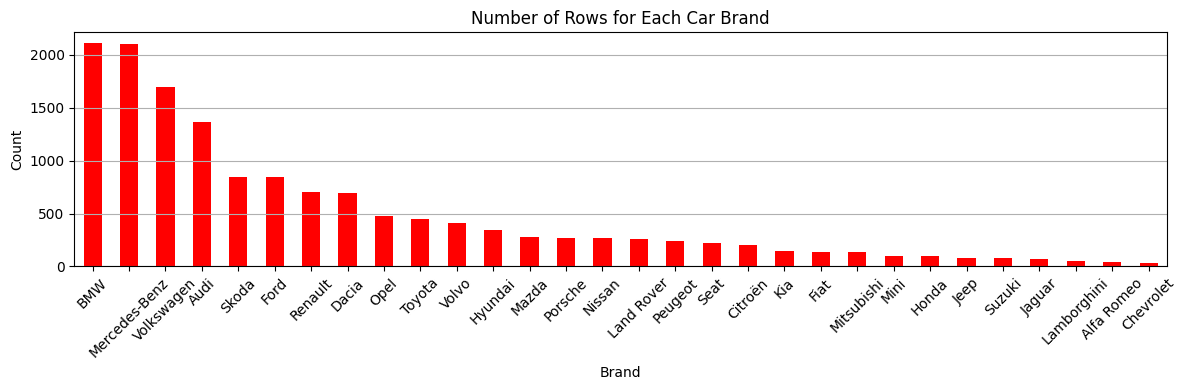

In [39]:
# Create a bar plot
plt.figure(figsize=(12, 4))
make_counts.head(30).plot(kind="bar", color="red")
plt.title("Number of Rows for Each Car Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis="y")

plt.tight_layout()
plt.show()

Keep only the car brands that have more than 20 rows

In [38]:
brands_to_keep = make_counts[make_counts >= 20].index.tolist()
len(brands_to_keep)

32

In [40]:
df_filtered = df_concat[df_concat["make"].isin(brands_to_keep)]
df_filtered.shape

(14775, 16)

In [43]:
df_filtered.to_csv(files_path + "autovit_data.csv")